In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
receiving_summary = pd.read_csv('receiving_summary.csv')
receiving_depth = pd.read_csv('receiving_depth.csv')
receiving_concept = pd.read_csv('receiving_concept.csv')
receiving_scheme = pd.read_csv('receiving_scheme.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
receiving_summary.head()

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,Justin Jefferson,61398,WR,MIN,18,10.7,11,73.0,55.0,22,40,1,4.9,7,83,18,0,83.1,86.0,90.2,NaN,90.2,0.0,0,5,64,0.0,0,777,4,135,93.8,729,29.0,225,107.9,185,8,70.0,544,1857,639,4.7,13.8,2.55
1,Travis Kelce,7844,TE,KC,20,7.5,25,75.3,45.5,10,22,0,4.2,6,92,16,2,88.2,51.7,91.3,73.1,91.6,26.0,202,3,52,3.6,28,776,4,137,90.6,703,44.2,343,123.8,182,16,29.1,226,1596,772,5.6,11.6,2.27
2,Tyreek Hill,10799,WR,MIA,18,12.6,12,69.6,50.0,13,26,1,3.8,5,81,17,1,89.7,67.1,92.1,NaN,92.0,1.1,7,7,64,0.0,0,614,5,126,94.3,579,42.3,260,97.8,181,7,54.4,334,1779,524,4.2,14.1,3.07
3,Davante Adams,8688,WR,LV,17,12.8,16,59.5,44.1,15,34,0,5.7,6,66,23,1,76.9,59.2,90.1,66.1,90.5,0.0,0,6,60,0.2,1,657,2,100,94.1,618,30.0,197,102.2,168,14,69.6,457,1516,502,5.0,15.2,2.45
4,CeeDee Lamb,61570,WR,DAL,19,10.3,16,72.5,46.7,14,30,1,5.5,7,75,9,0,78.9,86.0,86.2,NaN,87.0,0.3,2,5,46,0.0,0,678,4,121,95.3,646,62.7,425,108.5,167,10,36.1,245,1544,555,4.6,12.8,2.39


In [5]:
receiving_summary.describe()

,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
count,510.000000,510.000000,510.000000,510.000000,510.000000,361.000000,510.000000,510.000000,510.000000,495.000000,510.000000,510.000000,510.000000,510.000000,492.000000,497.000000,510.000000,329.000000,507.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,491.000000,491.000000,506.000000
mean,42907.268627,11.872549,6.772157,3.092157,70.048431,45.188089,2.501961,5.456863,0.119608,6.784040,1.527451,12.570588,16.339216,0.335294,66.071951,65.223340,64.439804,58.811550,62.668639,14.046471,28.380392,0.854902,28.756863,9.335098,16.511765,232.411765,1.062745,23.919608,84.328235,194.990196,26.373333,67.790196,89.707059,34.201961,1.556863,31.849608,83.654902,261.556863,124.419608,5.551935,10.324236,1.220178
std,28272.010269,5.462268,6.765326,4.615398,21.640026,31.257474,3.984621,7.990976,0.353773,12.044945,1.896702,16.308239,9.340988,0.756978,14.807412,19.080096,11.200188,17.175532,11.815648,25.244791,63.741192,1.410919,19.122182,13.037850,39.099526,209.575057,1.527735,27.168387,16.726584,187.342741,22.820046,94.513027,27.164481,38.681974,2.356219,30.404393,131.860476,332.406448,146.695321,3.783187,5.388389,1.182216
min,698.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.500000,13.300000,26.700000,11.200000,28.100000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-10.000000,-6.000000,-6.000000,-6.000000,-10.000000
25%,11905.750000,7.250000,1.225000,0.000000,61.600000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,59.200000,61.200000,56.400000,47.800000,54.400000,0.000000,0.000000,0.000000,14.250000,0.000000,0.000000,54.250000,0.000000,3.250000,78.825000,40.000000,7.800000,6.000000,76.725000,6.000000,0.000000,6.525000,6.000000,30.000000,15.000000,3.400000,7.000000,0.700000
50%,45740.500000,13.000000,6.500000,1.000000,71.400000,44.400000,1.000000,2.000000,0.000000,4.200000,1.000000,6.000000,16.000000,0.000000,68.300000,71.100000,63.850000,64.400000,61.800000,0.050000,0.500000,0.000000,26.000000,2.600000,3.000000,167.500000,1.000000,13.000000,90.000000,129.500000,20.750000,26.000000,91.700000,19.000000,1.000000,16.650000,25.500000,130.000000,68.000000,5.000000,9.900000,1.080000
75%,60891.500000,17.000000,11.175000,4.000000,83.225000,61.500000,3.000000,7.000000,0.000000,8.600000,2.000000,18.000000,25.000000,0.000000,76.275000,78.100000,71.750000,72.100000,69.600000,16.900000,13.000000,1.000000,41.000000,15.875000,22.000000,352.000000,1.000000,34.000000,94.500000,312.000000,39.425000,89.750000,107.300000,50.750000,2.000000,62.575000,84.500000,376.750000,171.500000,7.000000,12.700000,1.550000
max,143786.000000,20.000000,49.000000,36.000000,100.000000,100.000000,24.000000,47.000000,2.000000,100.000000,9.000000,92.000000,32.000000,6.000000,91.000000,91.300000,92.100000,89.600000,92.400000,100.000000,358.000000,7.000000,98.000000,99.700000,663.000000,885.000000,10.000000,137.000000,100.000000,729.000000,100.000000,586.000000,158.300000,185.000000,16.000000,100.000000,630.000000,1857.000000,871.000000,34.000000,42.000000,12.000000


In [6]:
receiving_summary['position'].value_counts()

WR    227
HB    134
TE    119
FB     15
QB     10
LB      2
T       2
CB      1
Name: position, dtype: int64

In [11]:
receiving_positions = ['WR', 'HB', 'TE', 'FB']

In [12]:
receiving_summary = receiving_summary[receiving_summary['position'].isin(receiving_positions)]
receiving_concept = receiving_concept[receiving_concept['position'].isin(receiving_positions)]

In [13]:
receiving_summary.shape

(495, 45)

In [29]:
receiving_summary[receiving_summary['player_game_count'] >= 7]

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,Justin Jefferson,61398,WR,MIN,18,10.7,11,73.0,55.0,22,40,1,4.9,7,83,18,0,83.1,86.0,90.2,NaN,90.2,0.0,0,5,64,0.0,0,777,4,135,93.8,729,29.0,225,107.9,185,8,70.0,544,1857,639,4.7,13.8,2.55
1,Travis Kelce,7844,TE,KC,20,7.5,25,75.3,45.5,10,22,0,4.2,6,92,16,2,88.2,51.7,91.3,73.1,91.6,26.0,202,3,52,3.6,28,776,4,137,90.6,703,44.2,343,123.8,182,16,29.1,226,1596,772,5.6,11.6,2.27
2,Tyreek Hill,10799,WR,MIA,18,12.6,12,69.6,50.0,13,26,1,3.8,5,81,17,1,89.7,67.1,92.1,NaN,92.0,1.1,7,7,64,0.0,0,614,5,126,94.3,579,42.3,260,97.8,181,7,54.4,334,1779,524,4.2,14.1,3.07
3,Davante Adams,8688,WR,LV,17,12.8,16,59.5,44.1,15,34,0,5.7,6,66,23,1,76.9,59.2,90.1,66.1,90.5,0.0,0,6,60,0.2,1,657,2,100,94.1,618,30.0,197,102.2,168,14,69.6,457,1516,502,5.0,15.2,2.45
4,CeeDee Lamb,61570,WR,DAL,19,10.3,16,72.5,46.7,14,30,1,5.5,7,75,9,0,78.9,86.0,86.2,NaN,87.0,0.3,2,5,46,0.0,0,678,4,121,95.3,646,62.7,425,108.5,167,10,36.1,245,1544,555,4.6,12.8,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Keith Smith,9302,FB,ATL,16,1.0,0,50.0,NaN,0,0,0,0.0,0,0,2,0,64.7,70.5,53.8,56.0,51.5,18.4,14,0,8,48.7,37,76,0,1,47.4,36,6.6,5,60.4,2,0,10.5,8,8,8,8.0,8.0,0.22
461,Richard Rodgers,8733,TE,LAC,10,4.5,1,50.0,NaN,0,0,1,0.0,0,0,27,0,64.7,61.2,44.8,82.3,46.7,79.5,35,0,4,40.9,18,44,1,1,59.1,26,4.5,2,56.3,2,0,13.6,6,4,3,3.0,4.0,0.15
488,Khari Blasingame,44889,FB,CHI,16,-3.0,0,0.0,NaN,0,0,0,NaN,0,0,6,0,NaN,NaN,59.6,79.4,43.6,30.4,17,0,0,37.5,21,56,0,0,57.1,32,12.5,7,39.6,1,0,7.1,4,0,0,NaN,NaN,0.00
490,Hunter Long,60859,TE,MIA,10,2.0,0,0.0,NaN,0,0,1,NaN,0,0,17,0,64.7,61.2,57.5,50.5,57.2,74.4,32,0,0,48.8,21,43,1,0,48.8,21,14.0,6,39.6,1,0,11.6,5,0,0,NaN,NaN,0.00


In [ ]:
receiving_summary = receiving_summary[receiving_summary['player_game_count'] >= 7]

In [15]:
receiving_concept.head()

,player,player_id,position,team_name,player_game_count,base_targets,declined_penalties,franchise_id,penalties,screen_avg_depth_of_target,screen_avoided_tackles,screen_caught_percent,screen_contested_catch_rate,screen_contested_receptions,screen_contested_targets,screen_drop_rate,screen_drops,screen_first_downs,screen_fumbles,screen_grades_hands_drop,screen_grades_pass_route,screen_interceptions,screen_longest,screen_pass_block_rate,screen_pass_blocks,screen_pass_plays,screen_receptions,screen_route_rate,screen_routes,screen_targeted_qb_rating,screen_targets,screen_targets_percent,screen_touchdowns,screen_yards,screen_yards_after_catch,screen_yards_after_catch_per_reception,screen_yards_per_reception,screen_yprr,slot_avg_depth_of_target,slot_avoided_tackles,slot_caught_percent,slot_contested_catch_rate,slot_contested_receptions,slot_contested_targets,slot_drop_rate,slot_drops,slot_first_downs,slot_fumbles,slot_grades_hands_drop,slot_grades_pass_route,slot_interceptions,slot_longest,slot_pass_block_rate,slot_pass_blocks,slot_pass_plays,slot_receptions,slot_route_rate,slot_routes,slot_targeted_qb_rating,slot_targets,slot_targets_percent,slot_touchdowns,slot_yards,slot_yards_after_catch,slot_yards_after_catch_per_reception,slot_yards_per_reception,slot_yprr
0,Justin Jefferson,61398,WR,MIN,18,185,0,18,0,-1.4,0,100.0,NaN,0,0,0.0,0,4,0,92.4,72.5,0,17,0.0,0,77,14,93.5,72,90.8,14,7.6,0,81,101,7.2,5.8,1.13,10.9,5,81.5,75.0,9,12,4.3,2,27,0,90.1,90.9,1,64,0.0,0,225,44,92.4,208,117.2,54,29.2,1,710,295,6.7,16.1,3.41
1,Travis Kelce,7844,TE,KC,20,182,0,16,0,-2.1,5,93.8,NaN,0,0,6.3,1,4,0,76.0,67.6,0,18,7.8,6,77,15,88.3,68,105.5,16,8.8,1,69,103,6.9,4.6,1.01,8.0,13,78.5,54.5,6,11,4.6,3,42,1,89.8,91.0,0,52,0.6,2,343,62,94.2,323,123.1,79,43.4,4,750,321,5.2,12.1,2.32
2,Tyreek Hill,10799,WR,MIA,18,181,0,17,0,-2.0,3,90.0,100.0,1,1,5.3,1,4,0,90.5,93.3,0,18,0.0,0,42,18,90.5,38,87.9,20,11.0,0,102,138,7.7,5.7,2.68,10.5,4,73.2,55.6,5,9,3.7,2,32,1,91.2,93.0,1,39,0.0,0,260,52,95.4,248,99.4,71,39.2,1,639,257,4.9,12.3,2.58
3,Davante Adams,8688,WR,LV,17,168,0,23,0,-1.4,5,100.0,NaN,0,0,0.0,0,2,0,90.9,71.7,0,16,2.1,1,47,5,85.1,40,136.3,5,3.0,1,36,43,8.6,7.2,0.90,9.2,8,81.0,50.0,2,4,2.9,1,22,0,85.4,91.8,3,60,0.5,1,197,34,92.9,183,116.7,42,25.0,4,484,212,6.2,14.2,2.64
4,CeeDee Lamb,61570,WR,DAL,19,167,0,9,0,-2.9,4,89.5,NaN,0,0,5.6,1,3,0,81.9,64.9,0,13,0.0,0,47,17,97.9,46,85.1,19,11.4,0,84,134,7.9,4.9,1.83,10.5,7,77.2,55.6,10,18,2.7,2,46,0,83.6,84.0,4,39,0.0,0,425,71,95.3,405,106.6,92,55.1,4,967,319,4.5,13.6,2.39


In [16]:
list(filter(lambda x: 'target' in x, receiving_concept.columns))

['base_targets',
 'screen_avg_depth_of_target',
 'screen_contested_targets',
 'screen_targeted_qb_rating',
 'screen_targets',
 'screen_targets_percent',
 'slot_avg_depth_of_target',
 'slot_contested_targets',
 'slot_targeted_qb_rating',
 'slot_targets',
 'slot_targets_percent']

In [17]:
receiving_concept.describe()

,player_id,player_game_count,base_targets,declined_penalties,franchise_id,penalties,screen_avg_depth_of_target,screen_avoided_tackles,screen_caught_percent,screen_contested_catch_rate,screen_contested_receptions,screen_contested_targets,screen_drop_rate,screen_drops,screen_first_downs,screen_fumbles,screen_grades_hands_drop,screen_grades_pass_route,screen_interceptions,screen_longest,screen_pass_block_rate,screen_pass_blocks,screen_pass_plays,screen_receptions,screen_route_rate,screen_routes,screen_targeted_qb_rating,screen_targets,screen_targets_percent,screen_touchdowns,screen_yards,screen_yards_after_catch,screen_yards_after_catch_per_reception,screen_yards_per_reception,screen_yprr,slot_avg_depth_of_target,slot_avoided_tackles,slot_caught_percent,slot_contested_catch_rate,slot_contested_receptions,slot_contested_targets,slot_drop_rate,slot_drops,slot_first_downs,slot_fumbles,slot_grades_hands_drop,slot_grades_pass_route,slot_interceptions,slot_longest,slot_pass_block_rate,slot_pass_blocks,slot_pass_plays,slot_receptions,slot_route_rate,slot_routes,slot_targeted_qb_rating,slot_targets,slot_targets_percent,slot_touchdowns,slot_yards,slot_yards_after_catch,slot_yards_after_catch_per_reception,slot_yards_per_reception,slot_yprr
count,495.000000,495.000000,495.000000,495.0,495.000000,495.0,334.000000,495.000000,334.000000,36.000000,495.000000,495.000000,327.000000,495.000000,495.000000,495.000000,330.000000,469.000000,495.000000,495.000000,475.000000,495.000000,495.000000,495.000000,475.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,324.000000,324.000000,467.000000,376.000000,495.000000,376.000000,224.000000,495.000000,495.000000,358.000000,495.000000,495.000000,495.000000,475.000000,494.000000,495.000000,495.000000,462.000000,495.000000,495.000000,495.000000,462.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,349.000000,349.000000,462.000000
mean,43269.296970,11.890909,35.197980,0.0,16.355556,0.0,-3.027246,0.791919,89.190419,41.666667,0.032323,0.082828,3.903976,0.139394,0.991919,0.056566,79.112424,58.956290,0.016162,8.456566,5.911579,0.945455,23.321212,3.612121,89.177053,21.315152,60.819798,4.010101,12.889697,0.084848,22.808081,33.945455,8.987654,5.916667,1.055910,7.508245,0.860606,68.334043,44.618750,0.832323,1.810101,7.357263,0.452525,4.337374,0.076768,67.001474,61.220445,0.341414,16.123232,1.904545,0.757576,69.795960,7.620202,93.078788,65.410101,65.445455,10.921212,25.573535,0.498990,86.933333,36.612121,4.919771,10.503152,1.100130
std,28218.442159,5.429360,38.831844,0.0,9.373213,0.0,1.503571,1.704702,20.952747,48.550416,0.177036,0.316880,12.524979,0.385417,1.822024,0.239839,18.504142,20.011909,0.126224,11.086047,14.112451,1.865697,22.435690,5.482310,16.261344,21.137531,45.944123,5.969380,17.319495,0.306595,40.149840,57.513025,4.890457,4.729078,1.835347,6.929186,1.711702,26.934983,35.343541,1.690101,3.157841,17.631289,0.854417,7.476909,0.288381,17.573096,12.749834,0.806478,16.997230,6.371867,2.187982,95.217973,12.112713,8.646579,89.784670,45.620924,16.821637,24.825019,1.011822,147.682782,61.183065,3.280390,5.985444,1.602199
min,2973.000000,1.000000,1.000000,0.0,1.000000,0.0,-7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.600000,17.600000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,-1.000000,-0.300000,-7.000000,-4.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,28.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-0.300000
25%,11934.500000,8.000000,6.000000,0.0,8.000000,0.0,-4.000000,0.000000,85.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.700000,44.700000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,85.700000,4.000000,0.000000,0.0000

In [14]:
receiving_scheme.describe()

,player_id,player_game_count,base_targets,declined_penalties,franchise_id,man_avg_depth_of_target,man_avoided_tackles,man_caught_percent,man_contested_catch_rate,man_contested_receptions,man_contested_targets,man_drop_rate,man_drops,man_first_downs,man_fumbles,man_grades_hands_drop,man_grades_pass_route,man_interceptions,man_longest,man_pass_block_rate,man_pass_blocks,man_pass_plays,man_receptions,man_route_rate,man_routes,man_targeted_qb_rating,man_targets,man_targets_percent,man_touchdowns,man_yards,man_yards_after_catch,man_yards_after_catch_per_reception,man_yards_per_reception,man_yprr,penalties,zone_avg_depth_of_target,zone_avoided_tackles,zone_caught_percent,zone_contested_catch_rate,zone_contested_receptions,zone_contested_targets,zone_drop_rate,zone_drops,zone_first_downs,zone_fumbles,zone_grades_hands_drop,zone_grades_pass_route,zone_interceptions,zone_longest,zone_pass_block_rate,zone_pass_blocks,zone_pass_plays,zone_receptions,zone_route_rate,zone_routes,zone_targeted_qb_rating,zone_targets,zone_targets_percent,zone_touchdowns,zone_yards,zone_yards_after_catch,zone_yards_after_catch_per_reception,zone_yards_per_reception,zone_yprr
count,510.000000,510.000000,510.000000,510.0,510.000000,405.000000,510.000000,405.000000,253.000000,510.000000,510.000000,366.000000,510.000000,510.000000,510.000000,366.000000,486.000000,510.000000,510.000000,495.000000,510.000000,510.000000,510.000000,495.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,356.000000,356.000000,486.000000,510.0,485.000000,510.000000,485.000000,301.000000,510.000000,510.000000,470.000000,510.000000,510.000000,510.000000,468.000000,500.000000,510.000000,510.000000,507.000000,510.000000,510.000000,510.000000,507.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,468.000000,468.000000,499.000000
mean,42907.268627,11.872549,34.201961,0.0,16.339216,8.002469,0.580392,60.439506,44.333202,0.939216,2.064706,8.937978,0.378431,3.503922,0.066667,62.431421,61.205350,0.180392,16.435294,11.689091,5.205882,60.398039,5.215686,79.523030,48.076471,69.006863,8.486275,21.675294,0.615686,64.023529,27.605882,5.733146,11.288764,1.036687,0.0,6.708660,2.107843,73.109072,43.772093,1.176471,2.550980,5.712766,0.907843,7.254902,0.201961,66.526282,62.429800,0.535294,24.494118,8.829191,9.388235,136.647059,15.237255,86.032939,117.017647,82.797255,20.743137,62.800392,0.403922,162.431373,80.584314,5.566026,10.329060,1.257154
std,28272.010269,5.462268,38.681974,0.0,9.340988,7.479043,1.346030,30.616202,35.620626,1.756893,3.491462,19.257272,0.738983,5.400555,0.272272,15.942505,11.925048,0.472014,17.483046,16.936183,12.538145,58.508948,7.367730,19.797294,50.053410,46.398075,11.622535,18.787157,1.159800,102.639562,42.328349,5.974903,7.702411,1.568612,0.0,7.008944,3.233259,21.783830,35.411243,2.095986,3.908123,10.205710,1.289727,9.275828,0.567970,13.929387,10.923262,1.007696,17.979003,13.187483,22.173770,121.170409,16.912829,17.302550,110.524476,31.424924,22.868521,22.483828,0.825421,199.257054,94.014084,3.557280,5.430756,1.154789
min,698.000000,1.000000,1.000000,0.0,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.400000,28.800000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,-3.000000,-0.670000,0.0,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.500000,27.200000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-1.000000,-0.500000,-8.000000,-8.000000
25%,11905.750000,7.250000,6.000000,0.0,9.000000,2.500000,0.000000,47.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.500000,53.225000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,71.400000,8.000000,39.600000,1.000000,8.875000,0.000000,0.000000,0.000000,2.600000,6.500000,0.000000,0.0,1.200000,0

In [15]:
receiving_depth.describe()

,player_id,player_game_count,base_targets,behind_los_avg_depth_of_target,behind_los_avoided_tackles,behind_los_caught_percent,behind_los_contested_catch_rate,behind_los_contested_receptions,behind_los_contested_targets,behind_los_drop_rate,behind_los_drops,behind_los_first_downs,behind_los_fumbles,behind_los_grades_hands_drop,behind_los_grades_pass_route,behind_los_interceptions,behind_los_longest,behind_los_pass_block_rate,behind_los_pass_blocks,behind_los_pass_plays,behind_los_receptions,behind_los_route_rate,behind_los_routes,behind_los_targeted_qb_rating,behind_los_targets,behind_los_targets_percent,behind_los_touchdowns,behind_los_yards,behind_los_yards_after_catch,behind_los_yards_after_catch_per_reception,behind_los_yards_per_reception,behind_los_yprr,center_behind_los_avg_depth_of_target,center_behind_los_avoided_tackles,center_behind_los_caught_percent,center_behind_los_contested_catch_rate,center_behind_los_contested_receptions,center_behind_los_contested_targets,center_behind_los_drop_rate,center_behind_los_drops,center_behind_los_first_downs,center_behind_los_fumbles,center_behind_los_grades_hands_drop,center_behind_los_grades_pass_route,center_behind_los_interceptions,center_behind_los_longest,center_behind_los_pass_block_rate,center_behind_los_pass_blocks,center_behind_los_pass_plays,center_behind_los_receptions,center_behind_los_route_rate,center_behind_los_routes,center_behind_los_targeted_qb_rating,center_behind_los_targets,center_behind_los_targets_percent,center_behind_los_touchdowns,center_behind_los_yards,center_behind_los_yards_after_catch,center_behind_los_yards_after_catch_per_reception,center_behind_los_yards_per_reception,center_behind_los_yprr,center_deep_avg_depth_of_target,center_deep_avoided_tackles,center_deep_caught_percent,center_deep_contested_catch_rate,center_deep_contested_receptions,center_deep_contested_targets,center_deep_drop_rate,center_deep_drops,center_deep_first_downs,center_deep_fumbles,center_deep_grades_hands_drop,center_deep_grades_pass_route,center_deep_interceptions,center_deep_longest,center_deep_pass_block_rate,center_deep_pass_blocks,center_deep_pass_plays,center_deep_receptions,center_deep_route_rate,center_deep_routes,center_deep_targeted_qb_rating,center_deep_targets,center_deep_targets_percent,center_deep_touchdowns,center_deep_yards,center_deep_yards_after_catch,center_deep_yards_after_catch_per_reception,center_deep_yards_per_reception,center_deep_yprr,center_medium_avg_depth_of_target,center_medium_avoided_tackles,center_medium_caught_percent,center_medium_contested_catch_rate,center_medium_contested_receptions,center_medium_contested_targets,center_medium_drop_rate,center_medium_drops,center_medium_first_downs,center_medium_fumbles,center_medium_grades_hands_drop,center_medium_grades_pass_route,center_medium_interceptions,center_medium_longest,center_medium_pass_block_rate,center_medium_pass_blocks,center_medium_pass_plays,center_medium_receptions,center_medium_route_rate,center_medium_routes,center_medium_targeted_qb_rating,center_medium_targets,center_medium_targets_percent,center_medium_touchdowns,center_medium_yards,center_medium_yards_after_catch,center_medium_yards_after_catch_per_reception,center_medium_yards_per_reception,center_medium_yprr,center_short_avg_depth_of_target,center_short_avoided_tackles,center_short_caught_percent,center_short_contested_catch_rate,center_short_contested_receptions,center_short_contested_targets,center_short_drop_rate,center_short_drops,center_short_first_downs,center_short_fumbles,center_short_grades_hands_drop,center_short_grades_pass_route,center_short_interceptions,center_short_longest,center_short_pass_block_rate,center_short_pass_blocks,center_short_pass_plays,center_short_receptions,center_short_route_rate,center_short_routes,center_short_targeted_qb_rating,center_short_targets,center_short_targets_percent,center_short_touchdowns,center_short_yards,center_short_yards_after_catch,center_short_yards_after_catch_per_recepti

In [18]:
deep_cols = list(filter(lambda x: x.startswith('deep'), receiving_depth.columns))
receiving_depth[deep_cols]

,deep_avg_depth_of_target,deep_avoided_tackles,deep_caught_percent,deep_contested_catch_rate,deep_contested_receptions,deep_contested_targets,deep_drop_rate,deep_drops,deep_first_downs,deep_fumbles,deep_grades_hands_drop,deep_grades_pass_route,deep_interceptions,deep_longest,deep_pass_block_rate,deep_pass_blocks,deep_pass_plays,deep_receptions,deep_route_rate,deep_routes,deep_targeted_qb_rating,deep_targets,deep_targets_percent,deep_touchdowns,deep_yards,deep_yards_after_catch,deep_yards_after_catch_per_reception,deep_yards_per_reception,deep_yprr
0,27.5,1,60.7,61.5,8,13,10.5,2,17,0,67.7,99.9,2,64,0.0,0,32,17,87.5,28,86.9,28,15.1,1,594,146,8.6,34.9,21.21
1,24.9,0,25.0,0.0,0,3,25.0,1,3,0,36.2,90.5,0,52,0.0,0,12,3,100.0,12,64.9,12,6.6,0,109,43,14.3,36.3,9.08
2,31.5,0,48.7,40.0,4,10,9.5,2,19,1,57.1,97.2,2,64,0.0,0,46,19,84.8,39,113.0,39,21.5,5,669,104,5.5,35.2,17.15
3,29.2,0,39.5,54.5,6,11,16.7,3,15,0,38.1,99.9,3,60,0.0,0,40,15,95.0,38,93.8,38,22.6,9,593,121,8.1,39.5,15.61
4,28.3,0,51.7,44.4,4,9,6.3,1,15,0,65.6,99.1,4,46,0.0,0,31,15,93.5,29,97.3,29,17.4,4,424,43,2.9,28.3,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,NaN,0,0,0,NaN,0,0.0,0,0.0,0,0,0,NaN,NaN,NaN
506,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,NaN,0,0,0,NaN,0,0.0,0,0.0,0,0,0,NaN,NaN,NaN
507,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,NaN,0,0,0,NaN,0,0.0,0,0.0,0,0,0,NaN,NaN,NaN
508,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,NaN,0,0,0,NaN,0,0.0,0,0.0,0,0,0,NaN,NaN,NaN


In [22]:
receiving_depth.isna().sum()

player                                    0
player_id                                 0
position                                  0
team_name                                 0
player_game_count                         0
                                         ..
short_yards                               0
short_yards_after_catch                   0
short_yards_after_catch_per_reception    59
short_yards_per_reception                59
short_yprr                               41
Length: 473, dtype: int64

In [24]:
list(filter(lambda x: 'target' in x, receiving_summary.columns))

['avg_depth_of_target', 'contested_targets', 'targeted_qb_rating', 'targets']

<AxesSubplot:xlabel='targets', ylabel='Count'>

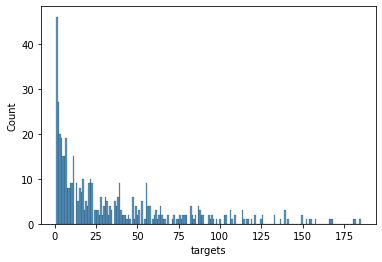

In [28]:
sb.histplot(data=receiving_summary, x='targets', bins=200)

<AxesSubplot:xlabel='player_game_count', ylabel='Count'>

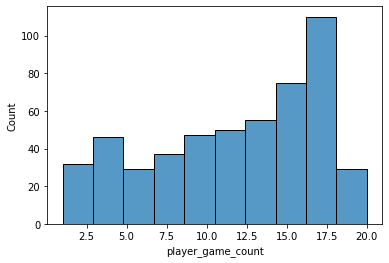

In [29]:
sb.histplot(data=receiving_summary, x='player_game_count') 